In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import scipy as sp
from scipy import stats
from scipy.optimize import curve_fit

import sympy as sy

Task 1

In [3]:
file_A_em_1nm = r"C:\Users\Admin\Desktop\Ma5 Auswertung\A_1nm_Resolution_em_1microAmperSensitivity_A_Emisson.txt"
file_A_ex_1nm = r"C:\Users\Admin\Desktop\Ma5 Auswertung\A_1nm_Resolution_exc_A_Excitation.txt"
file_A_ex_10nm = r"C:\Users\Admin\Desktop\Ma5 Auswertung\A_10nm_Resolution_exc_A_Excitation.txt"
file_B_em_1nm_1 = r"C:\Users\Admin\Desktop\Ma5 Auswertung\B_1nm_Resolution_em_1microAmperSensitivity_B_Emisson.txt"
file_B_em_1nm_30 = r"C:\Users\Admin\Desktop\Ma5 Auswertung\B_1nm_Resolution_em_30nanoAmperSensitivity_B_Emisson.txt"

file_A_em_old = r"C:\Users\Admin\Desktop\Ma5 Auswertung\old_data\G4\sampleA_em_1nm_A_Emisson.txt"
file_A_ex_old = r"C:\Users\Admin\Desktop\Ma5 Auswertung\old_data\G4\sampleA_exc_1nm_450nmEm_A_Excitation.txt"
file_B_em_old = r"C:\Users\Admin\Desktop\Ma5 Auswertung\old_data\G4\sampleA_em_1nm_B_Emisson.txt"



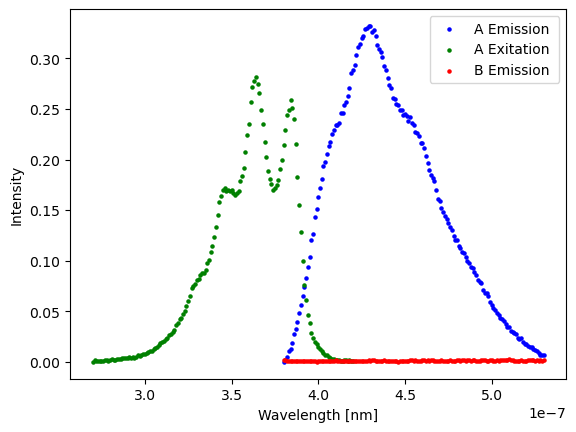

In [4]:
def read_Emmission_Excitation(file):
    def isNumeric(s):
        try:
            float(s)
            return True
        except ValueError:
            return False
    
    file = open(file, "r")
    A_ex_1nm = []
    for i in file.readlines():
        if isNumeric(i)== True:
            A_ex_1nm.append(float(i))
    file.close()    
    return np.array(A_ex_1nm)

A_em_old = read_Emmission_Excitation(file_A_em_old)
A_em_old = A_em_old - min(A_em_old)
A_ex_old = read_Emmission_Excitation(file_A_ex_old)
A_ex_old = A_ex_old - min(A_ex_old)
B_em_old = read_Emmission_Excitation(file_B_em_old)
B_em_old = B_em_old - min(B_em_old)

A_ex_old_lambda = np.arange(270,420+1,1)*1e-9
A_em_old_lambda = np.arange(380,530+1,1)*1e-9
B_em_old_lambda = np.arange(380,530+1,1)*1e-9

plt.scatter(A_em_old_lambda,A_em_old,color="b",marker='o',s=5,label="A Emission ")
plt.scatter(A_ex_old_lambda,A_ex_old,color="g",marker='o',s=5,label="A Exitation")
plt.scatter(B_em_old_lambda,B_em_old,color="r",marker='o',s=5,label="B Emission")

plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity")
plt.legend()
plt.savefig("Absorbtion and Emission AB")
plt.show()

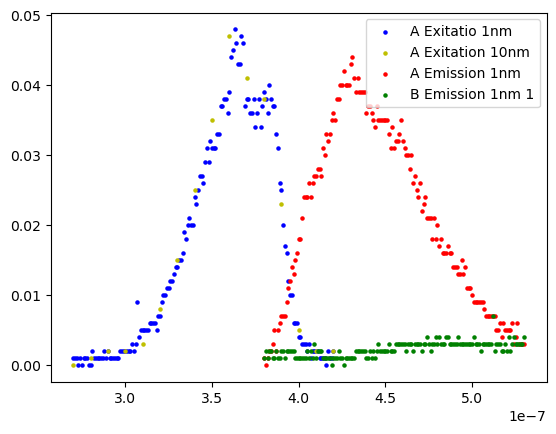

In [5]:

A_em_1nm = read_Emmission_Excitation(file_A_em_1nm)-min(read_Emmission_Excitation(file_A_em_1nm))
A_ex_1nm = read_Emmission_Excitation(file_A_ex_1nm)-min(read_Emmission_Excitation(file_A_ex_1nm))
A_ex_10nm= read_Emmission_Excitation(file_A_ex_10nm)-min(read_Emmission_Excitation(file_A_ex_10nm))
B_em_1nm_1 = read_Emmission_Excitation(file_B_em_1nm_1)-min(read_Emmission_Excitation(file_B_em_1nm_1))
B_em_1nm_30= read_Emmission_Excitation(file_B_em_1nm_30)-min(read_Emmission_Excitation(file_B_em_1nm_30))

A_em_1nm_lambda = np.arange(380,530+1,1)*1e-9
A_ex_1nm_lambda = np.arange(270,420+1,1)*1e-9
A_ex_10nm_lambda = np.arange(270,420+1,10)*1e-9
B_em_1nm_1_lambda = np.arange(380,530+1,1)*1e-9
B_em_1nm_30_lambda = np.arange(380,530+1,1)*1e-9

plt.scatter(A_ex_1nm_lambda,A_ex_1nm,color="b",marker='o',s=5,label="A Exitatio 1nm")
plt.scatter(A_ex_10nm_lambda,A_ex_10nm,color="y",marker='o',s=5, label="A Exitation 10nm")
plt.scatter(A_em_1nm_lambda,A_em_1nm,color="r",marker='o',s=5,label="A Emission 1nm")
plt.scatter(B_em_1nm_1_lambda,B_em_1nm_1,color="g",marker='o',s=5,label="B Emission 1nm 1")
#plt.scatter(B_em_1nm_30_lambda,B_em_1nm_30,color="k",marker='o',s=5,label="B Emission 1nm 30")
plt.legend()
plt.show()

In [6]:
int_B_old = np.trapz(B_em_old,B_em_old_lambda)
int_A_old = np.trapz(A_em_old,A_em_old_lambda)
rate_of_quantum_yield_old = int_B_old/int_A_old
print(rate_of_quantum_yield_old)

int_B = np.trapz(B_em_1nm_1,B_em_1nm_1_lambda)
int_A = np.trapz(A_em_1nm,A_em_1nm_lambda)
rate_of_quantum_yield = int_B/int_A

print(rate_of_quantum_yield)

0.008536345131000584
0.10871647509578841


C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


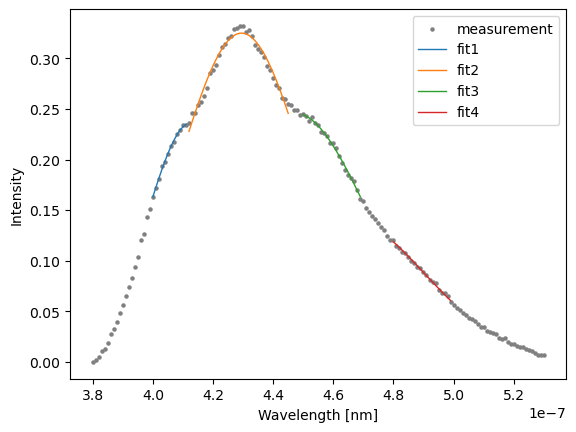

[4.1290432127309534e-07, 4.2947725442667426e-07, 4.4701099316967275e-07, 4.6276529924546147e-07]
[7.253184758454571e-10, 1.5303530382341684e-10, 1.129434000010984e-09, 4.331467649878211e-09]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x = A_em_old_lambda
y = A_em_old 

#data = np.genfromtxt('data.txt')
def gaussian(x, height, center, width):
    return height*np.exp(-(x - center)**2/(2*width**2)) 

def four_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3, c4, w4, h4, offset):
    return (gaussian(x, h1, c1, w1, ) +
        gaussian(x, h2, c2, w2, ) +
        gaussian(x, h3, c3, w3, ) +
        gaussian(x, h4, c4, w4,) + offset)



para, success = optimize.curve_fit(four_gaussians,x,y)


 
plt.scatter(x, y, color='gray',s=5, label='measurement')

a=20
b=32
x1 = x[a:b]
y1 = y[a:b]
#plt.scatter(x1,y1,s=5)
p1 = (0.24,4.1e-7,0.1e-7)
para1, success1 = optimize.curve_fit(gaussian,x1,y1,p0=p1)
plt.plot(x1,gaussian(x1,*para1),lw=1,linestyle="-",label= "fit1")

a=32
b=66
x2 = x[a:b]
y2 = y[a:b]
#plt.scatter(x2,y2,s=5)
p2 = (0.35,4.3e-7,0.1e-7)
para2, success2 = optimize.curve_fit(gaussian,x2,y2,p0=p2)
plt.plot(x2,gaussian(x2,*para2),lw=1,linestyle="-",label= "fit2")

a3=70
b3=90
x3 = x[a3:b3]
y3 = y[a3:b3]
#plt.scatter(x3,y3,s=5)
p3 = (0.24,4.5e-7,0.1e-7)
para3, success3 = optimize.curve_fit(gaussian,x3,y3,p0=p3)
plt.plot(x3,gaussian(x3,*para3),lw=1,linestyle="-",label= "fit3")

a=100
b=120
x4 = x[a:b]
y4 = y[a:b]
#plt.scatter(x4,y4,s=5)
p4 = (0.1,4.81e-7,0.1e-7)
para4, success4 = optimize.curve_fit(gaussian,x4,y4,p0=p4)
plt.plot(x4,gaussian(x4,*para4),lw=1,linestyle="-",label= "fit4")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity")
plt.legend(loc='best')
plt.savefig("Emission A")
plt.show()

error1 = np.sqrt(np.diag(success1))
waveerror1 = error1[1]
error2 = np.sqrt(np.diag(success2))
waveerror2 = error2[1]
error3 = np.sqrt(np.diag(success3))
waveerror3 = error3[1]
error4 = np.sqrt(np.diag(success4))
waveerror4 = error4[1]

wavelength_em = [para1[1],para2[1],para3[1],para4[1]]
wavelentgh_Error_em = [waveerror1,waveerror2,waveerror3,waveerror4]
print(wavelength_em)
print(wavelentgh_Error_em)

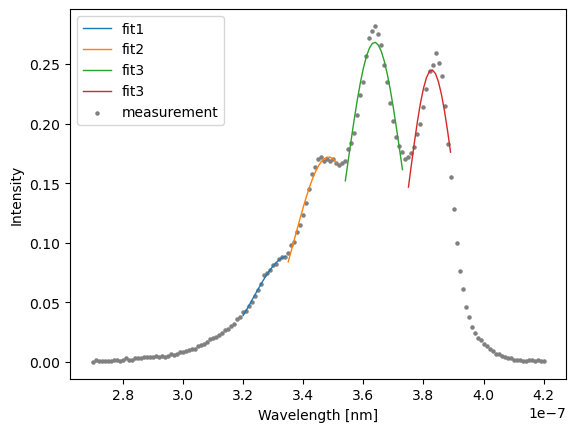

[3.353733556031594e-07, 3.483814832074304e-07, 3.63765353572741e-07, 3.827639886028449e-07]
[9.210653426647141e-10, 5.048529411487896e-10, 1.8351568294285069e-10, 3.050527282122537e-10]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

a = A_ex_old_lambda
b = A_ex_old 

#data = np.genfromtxt('data.txt')
def gaussian(x, height, center, width ):
    return height*np.exp(-(x - center)**2/(2*width**2))

def four_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3, c4, w4, h4, offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0) +
        gaussian(x, h3, c3, w3, offset=0) +
        gaussian(x, h4, c4, w4, offset=0) + offset)

j=50
k=65
a1 = a[j:k]
b1 = b[j:k]
#plt.scatter(a1,b1,s=20)
p1 = (0.1,3.3e-7,0.1e-7)
para1, success1 = optimize.curve_fit(gaussian,a1,b1,p0=p1)
plt.plot(a1,gaussian(a1,*para1),lw=1,linestyle="-",label= "fit1")

j=65
k=82
a2 = a[j:k]
b2 = b[j:k]
#plt.scatter(a2,b2,s=20)
p2 = (0.2,3.5e-7,0.1e-7)
para2, success2 = optimize.curve_fit(gaussian,a2,b2,p0=p2)
plt.plot(a2,gaussian(a2,*para2),lw=1,linestyle="-",label= "fit2")

j=84
k=104
a3 = a[j:k]
b3 = b[j:k]
#plt.scatter(a3,b3,s=20)
p3 = (0.27,3.6e-7,0.1e-7)
para3, success3 = optimize.curve_fit(gaussian,a3,b3,p0=p3)
plt.plot(a3,gaussian(a3,*para3),lw=1,linestyle="-",label= "fit3")

j=105
k=120
a4 = a[j:k]
b4 = b[j:k]
#plt.scatter(a4,b4,s=20)
p4 = (0.27,3.6e-7,0.1e-7)
para4, success4 = optimize.curve_fit(gaussian,a4,b4,p0=p4)
plt.plot(a4,gaussian(a4,*para4),lw=1,linestyle="-",label= "fit3")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity")
plt.scatter(a, b, color='gray',s=5, label='measurement')
plt.legend()
plt.savefig("Absorbtion A")
plt.show()

error1 = np.sqrt(np.diag(success1))
waveerror1 = error1[1]
error2 = np.sqrt(np.diag(success2))
waveerror2 = error2[1]
error3 = np.sqrt(np.diag(success3))
waveerror3 = error3[1]
error4 = np.sqrt(np.diag(success4))
waveerror4 = error4[1]

wavelength_ex = [para1[1],para2[1],para3[1],para4[1]]
wavelentgh_Error_ex = [waveerror1,waveerror2,waveerror3,waveerror4]
print(wavelength_ex)
print(wavelentgh_Error_ex)

In [9]:
from scipy import constants as const
def frequency(w):
    a=[]
    for i in w:
        a.append(2*np.pi*const.c/i)
    return a
def diff_frequency(w,diff_w):
    a=[]
    b = len(w)
    for i in range(b):
        a.append(2*np.pi*const.c*diff_w[i]/w[i]**2)
    return a
frequency_ex = frequency(wavelength_ex)
frequency_em = frequency(wavelength_em)
diff_frequency_ex = diff_frequency(wavelength_ex,wavelentgh_Error_ex)
diff_frequency_em = diff_frequency(wavelength_em,wavelentgh_Error_em)

print(frequency_em)
print(frequency_ex)
print(diff_frequency_em)
print(diff_frequency_ex)
15425309973208
7835294675501
2612348358472
3922051948329
8013651568476

[4561956536325528.0, 4385916944131097.5, 4213881976262432.0, 4070425268230236.5]
[5616580851872265.0, 5406864767801982.0, 5178204985187479.0, 4921182826484040.0]
[8013651568476.471, 1562830453001.2546, 10646945262524.611, 38099043725476.62]
[15425309973208.451, 7835294675501.795, 2612348358472.0483, 3922051948329.729]


8013651568476

Task 2

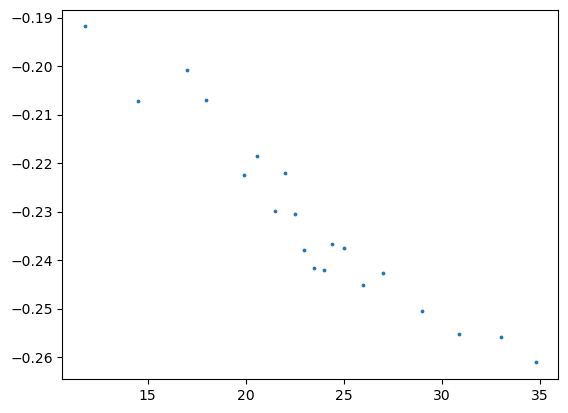

In [10]:
file_zerovoltage = r"C:\Users\Admin\Desktop\Ma5 Auswertung\M14 zero voltage data.txt"
file_anisotropy = r"C:\Users\Admin\Desktop\Ma5 Auswertung\M14 New anisotriopy data.txt"
file_gfactor = r"C:\Users\Admin\Desktop\Ma5 Auswertung\M14 New  g factor data.txt"
#file_anisotropy = r"C:\Users\Admin\Desktop\Ma5 Auswertung\old_data\G4\MX anisotropy data.txt"
def read(file):
    data = open(file,"r")
    liste = []
    for i in data.readlines():
        liste.append(i)
    liste2=[]
    for i in range(len(liste)):
        liste2.append(liste[i].split(" "))
    return np.array(liste2,dtype="float")

data_anisotropy = read(file_anisotropy)
data_gfactor = read(file_gfactor)
data_gfactor=data_gfactor[0]
data_zerovoltage = read(file_zerovoltage)
data_zerovoltage =data_zerovoltage[0]
data_anisotropy_old= data_anisotropy

for index,i in enumerate(data_anisotropy):
    data_anisotropy[index,1]=i[1]-data_zerovoltage[1]
    data_anisotropy[index,3]=i[3]-data_zerovoltage[3]

data_gfactor[1]=data_gfactor[1]-data_zerovoltage[1]
data_gfactor[3]=data_gfactor[3]-data_zerovoltage[3]

G1 = data_gfactor[1]/data_gfactor[3]



def R(VV,VH):
    a = (VV-G1*VH/(VV+2*G1*VH))
    return a

anisotropy=[]
for i in range(0,20,1):
    anisotropy.append(data_anisotropy[3*i:3*i+3].mean(axis=0))

    
a=[]
for index,i in enumerate(anisotropy):
    a.append(R(i[1],i[3]))
r_an = np.array(a)
temp = []
for i in anisotropy:
    temp.append(i[0])
temp= np.array(temp)

plt.scatter(temp,r_an,s=3)
plt.show()

[-7.29358179e-07  2.01460850e+01  9.06374223e+01 -3.17008048e-03
 -1.57568229e-01]


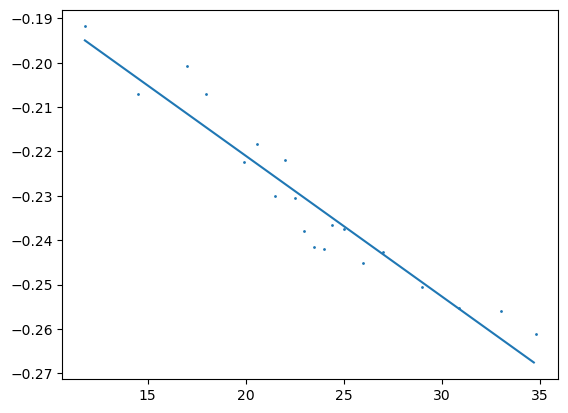

In [47]:
def f(T,A,Tm,tau,m,n):
    return A*(1+np.exp(-(T-Tm)/tau))+m*T+n
def gerade(T,b,c):
    return b*T+c

pf = (-0.08,21,0.4,-0.015,0.13)
bounds=((-np.inf,0,-np.inf,-np.inf,-np.inf),(0,np.inf,np.inf,np.inf,np.inf))
paraf, successf = optimize.curve_fit(f,temp,r_an,p0=pf,bounds=bounds)

print(paraf)
temperatur = np.arange(min(temp),max(temp),0.1)
plt.plot(temperatur,f(temperatur,*paraf),)
plt.scatter(temp,r_an,s=1)

Task 3

In [12]:
file_ludox = r"C:\Users\Admin\Desktop\Ma5 Auswertung\ludox.asc"
file_g_factor_hv_hh = r"C:\Users\Admin\Desktop\Ma5 Auswertung\g-factor_hv-hh.asc"
file_tem_11 = r"C:\Users\Admin\Desktop\Ma5 Auswertung\samplea_anisotropy_vh_vv_11.7.asc"
file_tem_23 = r"C:\Users\Admin\Desktop\Ma5 Auswertung\samplea_anisotropy_vh_vv_23.4_23.5.asc"
file_tem_33 = r"C:\Users\Admin\Desktop\Ma5 Auswertung\samplea_anisotropy_vh_vv_33.9_34.0.asc"


In [13]:
def reader(name):
    def is_float(string):
        if string.replace(".", "").isnumeric():
            return True
        else:
            return False
    
    with open(name,"r") as file:
        data =[]
        split_index=[]
        for i,line in enumerate(file.read().splitlines()):
            data.append(line)
            if line == "*END":
                split_index.append(i)
        data_array = np.array(data)
        data_array = np.split(data_array,split_index)
        x = len(split_index)
        a=[]
        c=[]
        for i in range(x):
            b=[]
            liste = data_array[i]
            for j in liste:
                if is_float(j)==True:
                    b.append(float(j))
                else:
                    pass
            a.append(b)
        return a
    


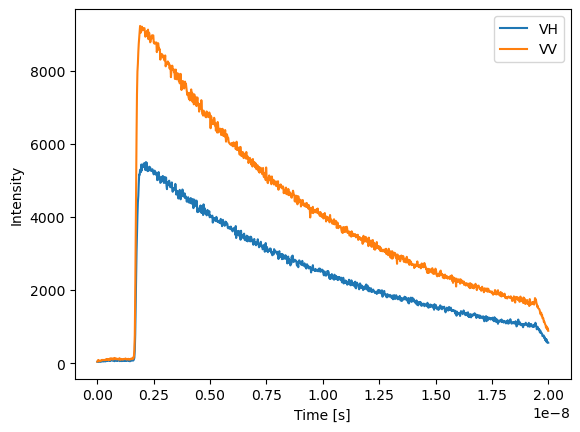

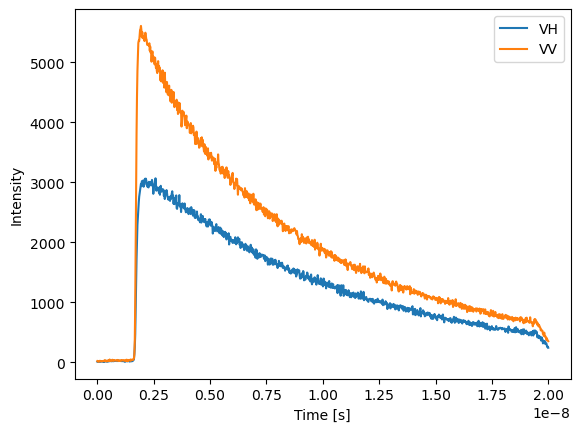

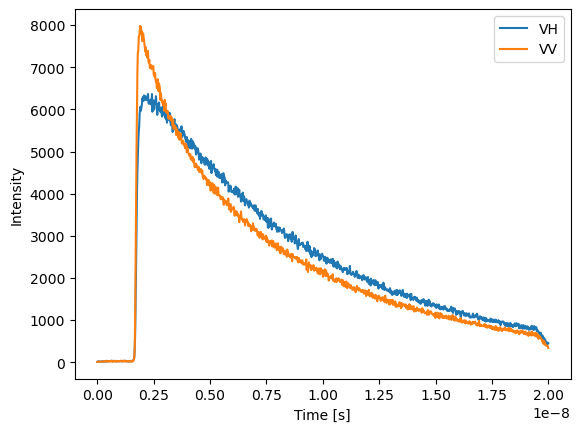

In [14]:
ludos = reader(file_ludox)
g_factor = reader(file_g_factor_hv_hh)

g_facotr_HV = g_factor[0]
g_factor_HH = g_factor[1]
tem_11 = reader(file_tem_11)
tem_23 = reader(file_tem_23)
tem_33 = reader(file_tem_33)

tem11_VH = tem_11[0]
tem11_VV = tem_11[1]
tem23_VH = tem_23[0]
tem23_VV = tem_23[1]
tem33_VH = tem_33[0]
tem33_VV = tem_33[1]

max_tem11VH = tem11_VH.index(max(tem11_VH))
max_tem11VV = tem11_VV.index(max(tem11_VV))
max_tem23VH = tem23_VH.index(max(tem23_VH))
max_tem23VV = tem23_VV.index(max(tem23_VV))
max_tem33VH = tem33_VH.index(max(tem33_VH))
max_tem33VV = tem33_VV.index(max(tem33_VV))

time = np.linspace(0,20e-9,1024)

plt.plot(time, tem11_VH,label="VH")
plt.plot(time,tem11_VV,label="VV")
plt.xlabel("Time [s]")
plt.ylabel("Intensity")
plt.legend()
plt.savefig("VH, VV tem 11")
plt.show()
plt.plot(time, tem23_VH,label="VH")
plt.plot(time,tem23_VV,label="VV")
plt.xlabel("Time [s]")
plt.ylabel("Intensity")
plt.legend()
plt.savefig("VH, VV tem 23")
plt.show()
plt.plot(time, tem33_VH,label="VH")
plt.plot(time,tem33_VV,label="VV")
plt.xlabel("Time [s]")
plt.ylabel("Intensity")
plt.legend()
plt.savefig("VH, VV tem 33")
plt.show()

1.0468951799637627


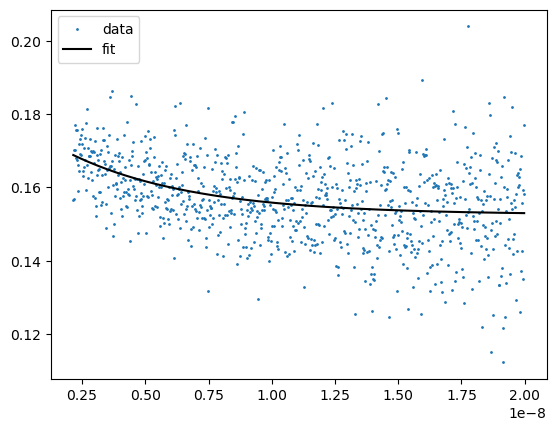

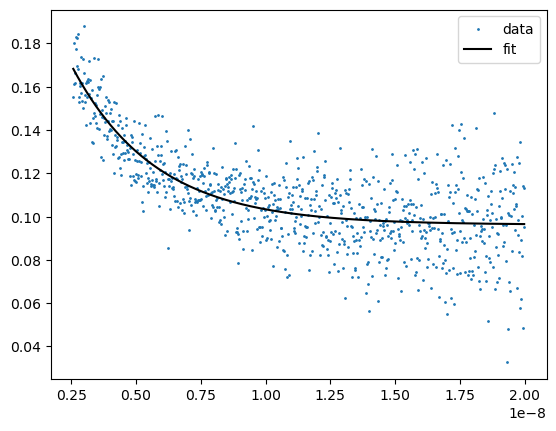

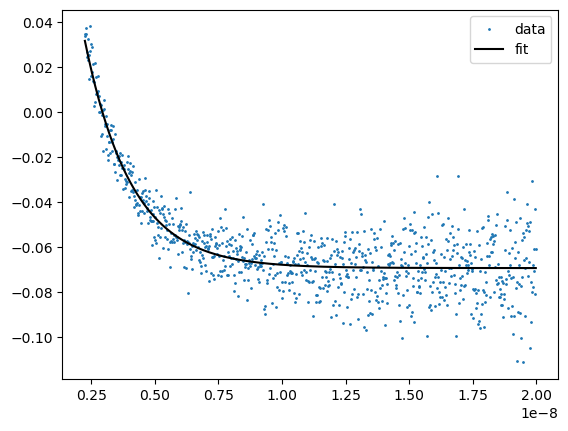

[0.15256517694071914, 0.09618979807270481, -0.06950095195572985]
[0.17777059528626468, 0.25702094626878125, 0.27567329908717336]
[4.919052673984731e-09, 3.21151994873644e-09, 1.832494032647319e-09]


In [23]:



def calc_G(HV,HH):
    a=[]
    b=len(HH)
    for i in range(b):
        a.append(HV[i]/HH[i])
    return np.mean(a)
G= calc_G(g_facotr_HV,g_factor_HH)        
print(G)
def R(VH,VV):
    b=[]
    k = len(VH)
    for i in range(k):
        a = (VV[i]-G*VH[i])/(VV[i]+2*G*VH[i])
        b.append(a)
    return b

R11 = R(tem11_VH[max_tem11VH:-1],tem11_VV[max_tem11VH:-1])
time11 = time[max_tem11VH:-1]
R23 = R(tem23_VH[max_tem23VH:-1],tem23_VV[max_tem23VH:-1])
time23 = time[max_tem23VH:-1]
R33 = R(tem33_VH[max_tem33VH:-1],tem33_VV[max_tem33VH:-1])
time33 = time[max_tem33VH:-1]

def rfit(t,rinf,r0,psi):
    return rinf+(r0-rinf)*np.exp(-t/psi)




guess11 = (0.17,0.2,3e-9,)
para11, success11 = optimize.curve_fit(rfit,time11,R11,p0=guess11)
plt.scatter(time11,R11,s=1,label="data")
plt.plot(time11,rfit(time11,*para11),color="k",label="fit")
plt.legend()
plt.savefig("r tem 11")
plt.show()


guess23 = (0.10,0.2,2.5e-9,)
para23, success23 = optimize.curve_fit(rfit,time23,R23, p0=guess23)
plt.scatter(time23,R23,s=1,label="data")
plt.plot(time23,rfit(time23,*para23),color="k",label="fit")
plt.legend()
plt.savefig("r tem 23")
plt.show()

guess33 = (0.10,0.2,2.5e-9,)
para33, success33 = optimize.curve_fit(rfit,time33,R33,p0 = guess33)
plt.scatter(time33,R33,s=1,label="data")
plt.plot(time33,rfit(time33,*para33),label="fit",color="k")
plt.legend()
plt.savefig("r tem 33")
plt.show()

rinf = [para11[0],para23[0],para33[0]]
r0 = [para11[1],para23[1],para33[1]]
psi = [para11[2],para23[2],para33[2]]
print(rinf)
print(r0)
print(psi)

In [41]:
N_A = const.Avogadro
kb = const.k
m = 0.0232#g
V_fluid = 100e-6#m^3
M=232.3#g/mol
V_mol = M*V_fluid/(m*N_A)

diffps = sy.Symbol("diffps")
T= sy.Symbol("T")
ps = sy.Symbol("ps")

vis = ps*kb*T/V_mol
diffvis = sy.diff(vis,ps)*diffps

vis11_value = {T:11.7, ps:psi[0]}
vis23_value = {T:23.5, ps:psi[1]}
vis33_value = {T:33.9, ps:psi[2]}
vis11 = vis.subs(vis11_value)
vis23 = vis.subs(vis23_value)
vis33 = vis.subs(vis33_value)
print(vis11)
print(vis23)
print(vis33)

error11 = np.sqrt(np.diag(success11))
error23 = np.sqrt(np.diag(success23))
error33 = np.sqrt(np.diag(success33))
diffrinf = [error11[0],error23[0],error33[0]]
diffr0 = [error11[1],error23[1],error33[1]]
diffpsi =  [error11[2],error23[2],error33[2]]
diffvis11_value = {T:11.7, ps:psi[0],diffps:diffpsi[0]}
diffvis23_value = {T:23.5, ps:psi[1],diffps:diffpsi[1]}
diffvis33_value = {T:33.9, ps:psi[2],diffps:diffpsi[2]}
diffvis11 = diffvis.subs(diffvis11_value)
diffvis23 = diffvis.subs(diffvis23_value)
diffvis33 = diffvis.subs(diffvis33_value)
print(diffvis11)
print(diffvis23)
print(diffvis33)



4.77903592239433e-7
6.26688097648667e-7
5.15840251381726e-7
1.12044730722578e-7
4.06274679146347e-8
1.90274325841160e-8
